In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [34]:
jays = pd.read_csv('tor2018.csv')
jays

,Name,W,L,SV,G,GS,IP,K/9,BB/9,HR/9,...,CT%,CB%,CH%,SF%,KN%,FBv,AVG,WHIP,BABIP.1,playerid
0,John Axford,0,0,0,1,1,3.0,9.00,0.00,0.00,...,5.3 %,26.3 %,NaN,NaN,NaN,95.0,0.111,0.33,0.167,9059
1,Ryan Borucki,4,6,0,17,17,97.2,6.17,3.04,0.65,...,NaN,NaN,23.3 %,NaN,NaN,91.5,0.253,1.32,0.291,16350
2,J.A. Happ,10,6,0,20,20,114.0,10.26,2.76,1.34,...,NaN,2.4 %,12.1 %,NaN,NaN,91.9,0.227,1.18,0.284,7410
3,Luis Santos,0,1,0,1,1,2.0,13.50,4.50,0.00,...,NaN,6.8 %,25.0 %,NaN,NaN,93.0,0.375,2.00,0.600,15006
4,Thomas Pannone,4,1,0,6,6,35.2,4.79,3.53,1.77,...,NaN,18.3 %,18.2 %,NaN,NaN,88.0,0.228,1.26,0.218,17281
5,Aaron Sanchez,4,6,0,20,20,105.0,7.37,4.97,0.94,...,NaN,12.0 %,23.8 %,NaN,NaN,93.7,0.259,1.56,0.304,11490
6,Sean Reid-Foley,2,4,0,7,7,33.1,11.34,5.67,1.62,...,NaN,5.5 %,7.9 %,NaN,NaN,93.8,0.242,1.56,0.313,17034
7,Sam Gaviglio,2,10,0,24,24,119.1,7.47,2.79,1.58,...,NaN,5.4 %,10.1 %,NaN,NaN,87.9,0.282,1.47,0.316,12778
8,Marcus Stroman,4,9,0,19,19,102.1,6.77,3.17,0.79,...,15.9 %,13.7 %,4.6 %,NaN,NaN,92.4,0.280,1.48,0.326,13431
9,Marco Estrada,7,14,0,28,28,143.2,6.45,3.13,1.82,...,6.1 %,7.6 %,37.0 %,NaN,NaN,88.6,0.270,1.43,0.284,1118


In [35]:
# Fill all nulls with 0
jays.fillna(0, inplace = True)

In [36]:
# Calculate innings pitcher per game
jays['IP/G']  = round(jays['IP']//jays['GS'] + (jays['IP']/jays['GS'] - jays['IP']//jays['GS']), 2)
jays['IP/G']

0     3.00
1     5.72
2     5.70
3     2.00
4     5.87
5     5.25
6     4.73
7     4.96
8     5.37
9     5.11
10    4.70
11    4.55
12    2.10
13    1.00
Name: IP/G, dtype: float64

In [37]:
for i in range(len(jays['GB%'])):
    jays['GB%'][i] = jays['GB%'][i][:(jays['GB%'][0].find(' '))]

jays['GB%'] = pd.to_numeric(jays['GB%'])

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
# Create percentiles for K, BB, IP/G, BABIP, FBv, GB%

K_ptile = []
BB_ptile = []
IPG_ptile = []
BABIP_ptile = []
FBv_ptile = []
GB_ptile = []
for i in range(len(jays)):
    K_ptile.append(percentileofscore(jays['K/9'], jays.loc[i,'K/9']))
    BB_ptile.append(100 - (percentileofscore(jays['BB/9'], jays.loc[i,'BB/9'])))
    IPG_ptile.append(percentileofscore(jays['IP/G'], jays.loc[i,'IP/G']))
    BABIP_ptile.append(100-(percentileofscore(jays['BABIP'], jays.loc[i,'BABIP'])))
    FBv_ptile.append(percentileofscore(jays['FBv'], jays.loc[i,'FBv']))
    GB_ptile.append(percentileofscore(jays['GB%'], jays.loc[i,'GB%']))
jays['K_ptile'] = K_ptile
jays['BB_ptile'] = BB_ptile
jays['IPG_ptile']= IPG_ptile
jays['BABIP_ptile'] = BABIP_ptile
jays['FBv_ptile'] = FBv_ptile
jays['GB_ptile'] = GB_ptile

In [39]:
plotdf = jays[['Name', 'K_ptile', 'BB_ptile','IPG_ptile','FBv_ptile','GB_ptile', 'BABIP_ptile']]
plotdf

,Name,K_ptile,BB_ptile,IPG_ptile,FBv_ptile,GB_ptile,BABIP_ptile
0,John Axford,75.000000,92.857143,28.571429,100.000000,100.000000,92.857143
1,Ryan Borucki,21.428571,71.428571,92.857143,50.000000,57.142857,64.285714
2,J.A. Happ,85.714286,85.714286,85.714286,57.142857,50.000000,75.000000
3,Luis Santos,100.000000,35.714286,14.285714,78.571429,85.714286,0.000000
4,Thomas Pannone,14.285714,50.000000,100.000000,14.285714,28.571429,85.714286
5,Aaron Sanchez,50.000000,21.428571,71.428571,85.714286,64.285714,57.142857
6,Sean Reid-Foley,92.857143,14.285714,50.000000,92.857143,35.714286,46.428571
7,Sam Gaviglio,57.142857,78.571429,57.142857,7.142857,71.428571,35.714286
8,Marcus Stroman,42.857143,57.142857,78.571429,64.285714,92.857143,28.571429
9,Marco Estrada,35.714286,64.285714,64.285714,21.428571,14.285714,75.000000


In [47]:
for i in range(4):
    # Set data
    x = np.array(plotdf.columns[1:].values)
    y = np.array(pd.to_numeric(plotdf.iloc[i,1:].values))
    print(x)
    print(y)

['K_ptile' 'BB_ptile' 'IPG_ptile' 'FBv_ptile' 'GB_ptile' 'BABIP_ptile']
[ 75.          92.85714286  28.57142857 100.         100.
  92.85714286]
['K_ptile' 'BB_ptile' 'IPG_ptile' 'FBv_ptile' 'GB_ptile' 'BABIP_ptile']
[21.42857143 71.42857143 92.85714286 50.         57.14285714 64.28571429]
['K_ptile' 'BB_ptile' 'IPG_ptile' 'FBv_ptile' 'GB_ptile' 'BABIP_ptile']
[85.71428571 85.71428571 85.71428571 57.14285714 50.         75.        ]
['K_ptile' 'BB_ptile' 'IPG_ptile' 'FBv_ptile' 'GB_ptile' 'BABIP_ptile']
[100.          35.71428571  14.28571429  78.57142857  85.71428571
   0.        ]


In [42]:
def radar(num_vars, frame = 'circle'):
    '''
    num_vars = # of variables
    frame = shape of frame (default = circle)
    '''
    
    # create evenly spaced vertices starting at 0, ending at 2*pi (360deg) for 'num_vars' times
    theta = np.linspace(0, 2*np.pi, num = num_vars, endpoint = False)
    
    class RadarAxes(PolarAxes):
        
        name = 'radar'
        # variable # of args
        # kwags for variable keyworded argument list
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # set first axis @ 90 degrees (ie. at top)
            self.set_theta_zero_location('N')
        
        def fill(self, *args, closed = True, **kwargs):
            # make line closed by default
            return super().fill(closed = closed, *args, **kwargs)
        
        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)
                
        # add labels at their corresponding degrees        
        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        # how to create frame
        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)
        
        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)
            
        
        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)
    register_projection(RadarAxes)
    return theta

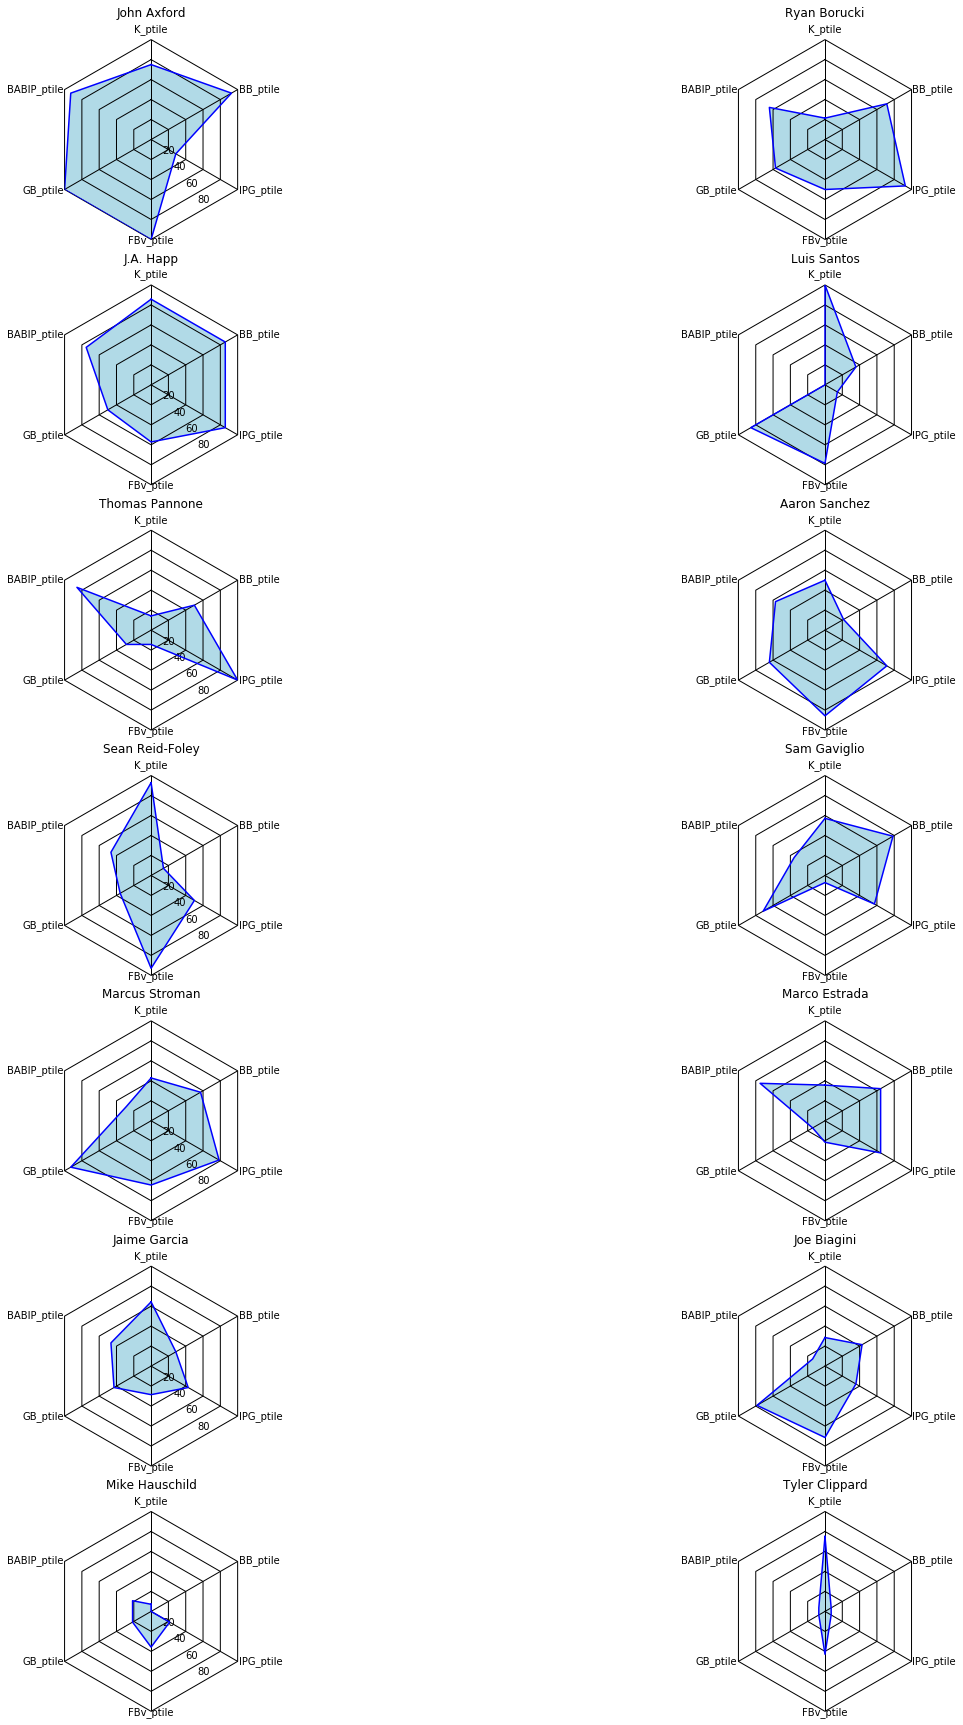

In [104]:
N = 6

x_as = [n / float(N) * 2 * pi for n in range(N)]

theta = radar(6, frame = 'polygon')
theta

# Set color of axes
plt.rc('axes', linewidth=1, edgecolor="black", facecolor = "white")



# Create polar plot
fig, ax = plt.subplots(7, 2, figsize=(24,24), sharex = True, sharey= True, subplot_kw = dict(projection='radar'))
ax = ax.flat
plt.setp(ax, yticks = [20, 40, 60, 80], yticklabels = ["20", "40", "60", "80"])

# Set canvas colour
#fig.patch.set_facecolor('xkcd:mint green')

for j in range(len(plotdf)):
    # Set data
    x = np.array(plotdf.columns[1:].values)
    y = np.array(pd.to_numeric(plotdf.iloc[j,1:].values))
    # Set clockwise rotation. That is:
    ax[j].set_theta_offset(pi / 2)
    ax[j].set_theta_direction(-1)


    # Set position of y-labels
    ax[j].set_rlabel_position(145)


    # Set color and linestyle of grid
    ax[j].xaxis.grid(True, color="black", linestyle='solid', linewidth=1)
    ax[j].yaxis.grid(True, color="black", linestyle='solid', linewidth=1)


    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], [])

    # Set radial ticks
#     ax[j].set_rticks([0, 20, 40, 60, 80, 100])
    #ax[j].set_rlabel_position(145)


    # Plot data
    ax[j].plot(x_as, y, linewidth=1.5, color = 'b', linestyle='solid', zorder=3)

    # Fill area
    ax[j].fill(x_as, y, 'lightblue', alpha=0.95)


    # Set axes limits
    plt.ylim(0, 100)
#   plt.yticks([0, 20, 40, 60, 80, 100], ["0", "20", "40", "60", "80", "100"])
    
    # Add title
    ax[j].set_title(plotdf.iloc[j, 0], position=(0.5, 1.1), horizontalalignment='center', verticalalignment='center')
    
    #Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 10
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1

        ax[j].text(angle_rad, 100 + distance_ax, x[i], size=10, horizontalalignment=ha, verticalalignment="center")
    

# Show polar plot
plt.tight_layout()
plt.show()